In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [87]:
df=pd.read_csv('D:\\python\\Titanic_ML\\dollar vs Rs\\EXINUS.csv', parse_dates=["DATE"])

In [88]:
df.sample(10)

,DATE,EXINUS
105,1981-10-01,9.1348
521,2016-06-01,67.2655
234,1992-07-01,28.5639
389,2005-06-01,43.5245
370,2003-11-01,45.5544
240,1993-01-01,29.0432
33,1975-10-01,8.8945
61,1978-02-01,8.1094
309,1998-10-01,42.3943
530,2017-03-01,65.8009


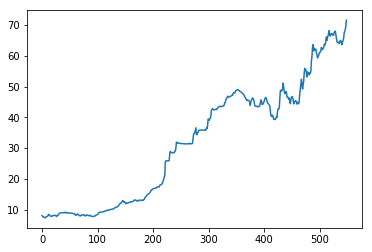

In [89]:

df['EXINUS'].plot(x=df.DATE, y=df.EXINUS)

In [90]:
df.head()

,DATE,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
DATE      549 non-null datetime64[ns]
EXINUS    549 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [92]:
df.index

RangeIndex(start=0, stop=549, step=1)

In [93]:
df.drop([0], axis=0, inplace=True)

In [94]:
df.head()

,DATE,EXINUS
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
5,1973-06-01,7.2719


In [95]:
df.index.rename('index', inplace=True)

In [96]:
df.head()

,DATE,EXINUS
index,,
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
5,1973-06-01,7.2719


In [97]:
df=df.dropna(how='any')

In [98]:
df.head()

,DATE,EXINUS
index,,
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
5,1973-06-01,7.2719


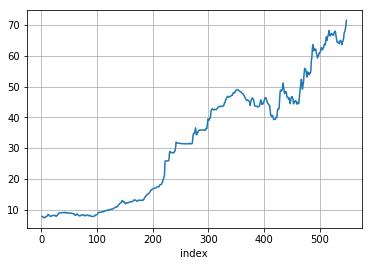

In [69]:
df['EXINUS'].plot(grid=True)

In [99]:
rupess=df['EXINUS']
date=df['DATE']
df1=df[['DATE', 'EXINUS']]
df2=df1.set_index('DATE')
df2.sort_index(inplace=True)

In [100]:
df2.head()

,EXINUS
DATE,
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
1973-06-01,7.2719


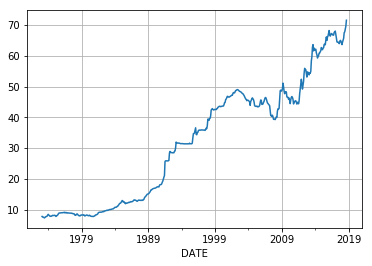

In [101]:

df2['EXINUS'].plot(grid=True)

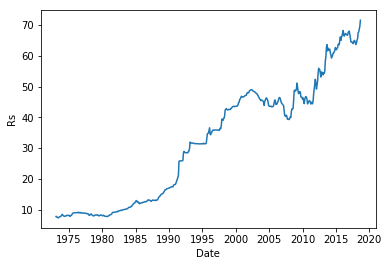

In [102]:
plt.plot(df2)
plt.xlabel('Date')
plt.ylabel('Rs')
plt.show()

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 1973-02-01 to 2018-09-01
Data columns (total 1 columns):
EXINUS    548 non-null float64
dtypes: float64(1)
memory usage: 8.6+ KB


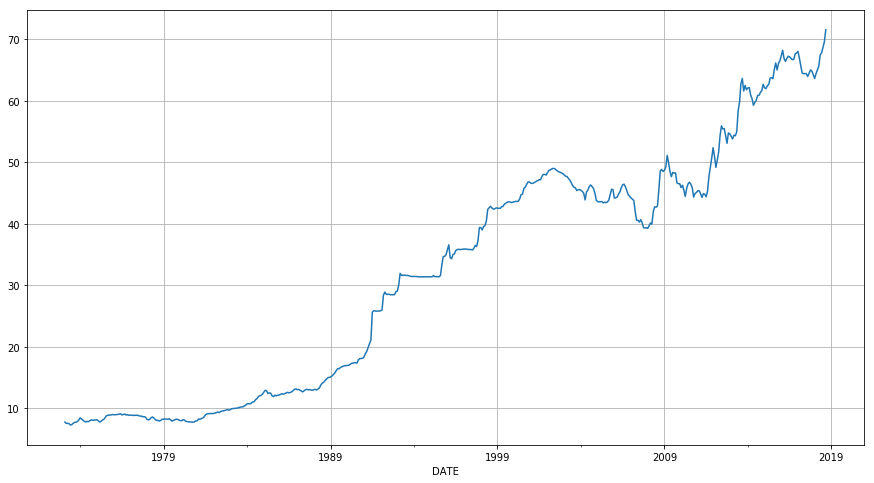

In [103]:
plt.figure(figsize=(15,8))
df2['EXINUS'].plot(grid=True)

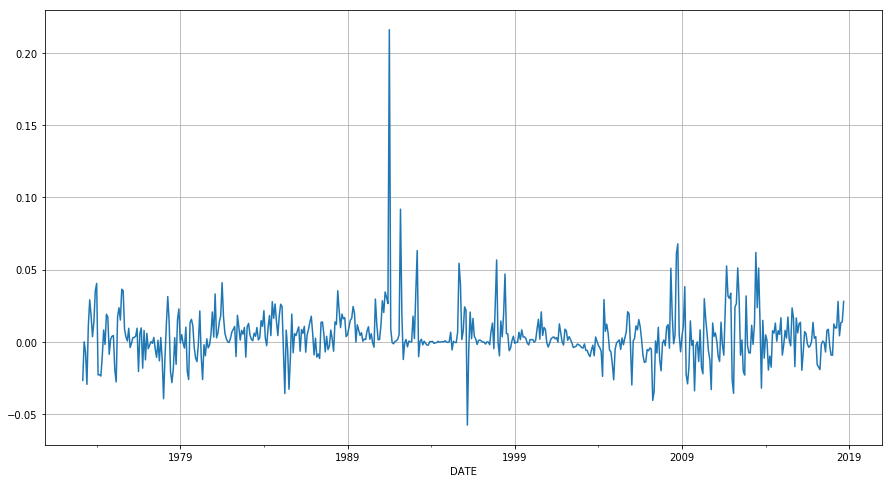

In [104]:
plt.figure(figsize=(15,8))
df2['Exx']=df2['EXINUS'].pct_change()
df2['Exx'].plot(grid=True)

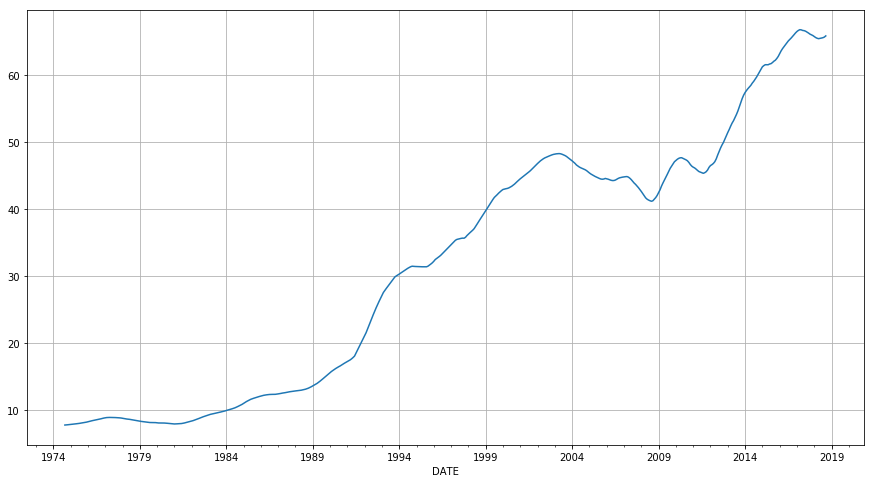

In [105]:
plt.figure(figsize=(15,8))
df2['for']=df2['EXINUS'].rolling(window=20, center=False).mean()
df2['for'].plot(grid=True)
plt.show()

In [113]:
df2.head()

,EXINUS,Exx,for
DATE,,,
1973-02-01,7.7538,NaN,NaN
1973-03-01,7.5465,-0.026735,NaN
1973-04-01,7.5462,-0.000040,NaN
1973-05-01,7.4927,-0.007090,NaN
1973-06-01,7.2719,-0.029469,NaN


In [117]:
df2['t']=range (1, len(df)+1)
df2['sqr t ']=df2['t']**2
df2['tdx']=df2['t']*df['EXINUS']
n=len(df)

slope=(n*df2['tdx'].sum()- df2['t'].sum()*df['EXINUS'].sum())/(n*df2['sqr t '].sum()-(df2['t'].sum())**2)
print("slope is ", slope)

slope is  -0.3505666075074394


In [120]:
intercept=(df['EXINUS'].sum()*df2['sqr t '].sum()- df2['t'].sum()*df2['tdx'].sum())/(n*df2['sqr t '].sum()-(df2['t'].sum())**2)
print("intercept value is :-", intercept)

intercept value is :- 128.190522811887


In [123]:
df['forcast']=intercept+slope*df2['t']
df['error']=df2['EXINUS']-df['forcast']
mean_error=df['error'].mean()
print("the mean error is :-", mean_error)

the mean error is :- nan


In [127]:
mean=df2['t']*slope

In [130]:
df['forcast']=intercept+mean
df['error']=df2['EXINUS']-df['forcast']
eror=df['error'].mean()